In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
# 1. connect file drive
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

from statsmodels.tsa.stattools import adfuller  # kiểm tra chuỗi có tính dừng không -> có phụ thuộc vào thời gian chạy không?
from statsmodels.tsa.seasonal import seasonal_decompose   # phân tích -> thành phần chuỗi gốc, thành phần xu hướng, thành phần mùa vụ và thành phần nhiễu

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Mounted at /content/drive


In [ ]:
# 2. Đọc file csv
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/IMP.csv'
company_csv = '/content/drive/My Drive/data1/CTG_Stock_Data.csv'
# company_csv = '/content/drive/MyDrive/Colab Notebooks/Datacrawl/VMD.csv'
data = pd.read_csv(company_csv)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/27/2014,11717867188,11856540039,11648531250,11717867188,11717867188,608510
1,2/6/2014,11648531250,11717867188,11509858398,11648531250,11648531250,1140509
2,2/7/2014,11579194336,11717867188,11509858398,11579194336,11579194336,826750
3,2/10/2014,11509858398,11648531250,11440521484,11509858398,11509858398,1639712
4,2/11/2014,11579194336,11717867188,11440521484,11509858398,11509858398,2082063
...,...,...,...,...,...,...,...
2460,12/8/2023,27000000000,27100000000,26700000000,26900000000,26900000000,4518900
2461,12/11/2023,26950000000,27050000000,26700000000,26850000000,26850000000,2323100
2462,12/12/2023,26900000000,27000000000,26700000000,27000000000,27000000000,3346200
2463,12/13/2023,27150000000,27350000000,26700000000,26750000000,26750000000,3749800


In [ ]:
# 2. Đọc file dữ liệu và chia train test  theo tỉ lệ 7:3
df = pd.read_csv(company_csv)
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing.
train_size = int(0.7* len(df))
test_size = len(df)-train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
exog_train = np.arange(len(train_data))

In [ ]:
model_autoARIMA = auto_arima(y_train,start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,
                      exogenous= data[['High','Open','Low']][:len(y_train)])

model_autoARIMA.summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85645.626, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=84379.747, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=72565.563, Time=1.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72542.135, Time=1.91 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=72544.024, Time=1.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=72544.080, Time=1.96 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=72555.509, Time=1.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.58 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=72560.006, Time=3.81 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=72539.921, Time=1.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=72562.954, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=7

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1725
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -36264.961
Date:                Sat, 30 Dec 2023   AIC                          72539.921
Time:                        18:04:22   BIC                          72567.186
Sample:                             0   HQIC                         72550.007
                               - 1725                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.998e+07   5.17e-13   9.68e+19      0.000       5e+07       5e+07
ar.L1          0.0374      0.013      2.951      0.003       0.013       0.062
ar.L2          0.9593      0.013     75.664      0.000       0.934       0.984
ma.L1          0.9240      0.017     54.035      0.000       0.890       0.957
sigma2      1.072e+17   1.32e-20   8.13e+36      0.000    1.07e+17    1.07e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1046.76
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.43   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+53. Standard errors may be unstable.
"""

In [ ]:
model = ARIMA(y_train, order=(2,0,1),exog=data[['High','Open','Low']][:len(y_train)]).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1725
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -34741.250
Date:                Sat, 30 Dec 2023   AIC                          69498.500
Time:                        18:04:28   BIC                          69542.124
Sample:                             0   HQIC                         69514.638
                               - 1725                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.508e+06   3.39e-09   1.63e+15      0.000    5.51e+06    5.51e+06
High           0.8391      0.011     76.901      0.000       0.818       0.860
Open          -0.6167      0.012    -52.724      0.000      -0.640      -0.594
Low            0.7747      0.009     87.776      0.000       0.757       0.792
ar.L1         -0.0724      0.757     -0.096      0.924      -1.557       1.412
ar.L2         -0.0100      0.109     -0.092      0.927      -0.224       0.204
ma.L1         -0.0736      0.757     -0.097      0.923      -1.557       1.410
sigma2      1.829e+16   7.41e-17   2.47e+32      0.000    1.83e+16    1.83e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2788.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+48. Standard errors may be unstable.
"""

In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(start=int(x_test[0]), end=int(len(x_test)+x_test[0]-1),exog=data[['High','Open','Low']][int(x_test[0]):int(len(x_test)+x_test[0])])
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 261599514.14672935
Testing MAPE: 0.007376681958907275
Testing MSLE: 0.00010124615497249778


Predicted closing prices for the next 30 days:
2465    2.531020e+10
2466    2.510848e+10
2467    2.556647e+10
2468    2.550421e+10
2469    2.577216e+10
2470    2.639236e+10
2471    2.601140e+10
2472    2.626978e+10
2473    2.665657e+10
2474    2.724072e+10
2475    2.695956e+10
2476    2.650959e+10
2477    2.640581e+10
2478    2.633018e+10
2479    2.637604e+10
2480    2.617161e+10
2481    2.601584e+10
2482    2.608238e+10
2483    2.583939e+10
2484    2.626978e+10
2485    2.644934e+10
2486    2.603086e+10
2487    2.635041e+10
2488    2.653550e+10
2489    2.659716e+10
2490    2.681736e+10
2491    2.677940e+10
2492    2.676828e+10
2493    2.675716e+10
2494    2.689666e+10
Name: predicted_mean, dtype: float64


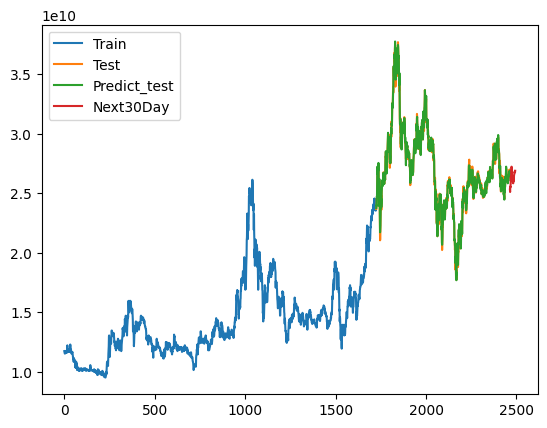

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Assuming 'data' is your training data, replace it with your actual training data
exog_data = data[['High', 'Open', 'Low']][last_index - 523:last_index]

y_next_30_days = model.predict(start=int(x_next_30_days[0]), end=int(len(x_next_30_days) + x_next_30_days[0] - 1),
                               exog=data[['High','Open','Low']][last_index-770:last_index])

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predict_test','Next30Day'])
plt.show()